### Tree Based Methods

This notebook will cover the following topics:

* Regression Trees
* Classification Trees
* Boosting
* Random Forests



First off, given a feature matrix $A \in \R^{n x p}$ we can construct a tree based model as follows:

1. Split the data into two parts based on a feature $j$ and a threshold $t$.

$$
\begin{align}
A_1 &= \{a \in A: a_j \leq t\} \\
A_2 &= \{a \in A: a_j > t\}
\end{align}
$$

2. Repeat step 1 on each of the two parts.

3. Stop when a stopping criterion is met (such as max node)

This is a recursive process that can be visualized as a tree. The stopping criterion is important because if we don't stop we will end up with a tree that perfectly fits the data. 


### Cost Complexity Pruning

In order to avoid overfitting we can use cost complexity pruning. This is a post pruning method that prunes the tree after it has been constructed. The idea is to find the subtree that minimizes the cost function:

$$
\begin{align}
C_\alpha(T) &= \sum_{m=1}^M \sum_{i \in R_m} (y_i - \hat{y}_{R_m})^2 + \alpha |T|
\end{align}

$$

where $R_m$ is the set of observations in the $m$th terminal node, $\hat{y}_{R_m}$ is the mean response of the observations in $R_m$, and $|T|$ is the number of terminal nodes in the tree $T$. The parameter $\alpha$ controls the complexity of the tree. The smaller the value of $\alpha$ the more complex the tree. The larger the value of $\alpha$ the simpler the tree.


In [1]:
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
import numpy as np

from matplotlib import pyplot as plt

### Generate some noisy data (in the case of univariate regression)



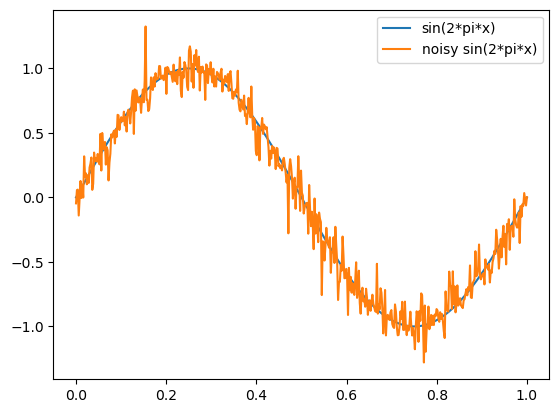

In [2]:
x= np.linspace(0, 1, 500)
y = np.sin(2 * np.pi * x) 
noisy_y = y + np.random.exponential(0.15, 500)*(np.random.binomial(1,0.5, 500)-0.5)


fig, ax = plt.subplots()

ax.plot(x, y, label='sin(2*pi*x)')
ax.plot(x, noisy_y, label='noisy sin(2*pi*x)')

ax.legend()




### Train the Decision Tree Regressor

- In the case of one feautre; the model predicts locally with a piecewise constant function.

In [3]:
tree_model = tree.DecisionTreeRegressor(max_depth=5)

tree_model

DecisionTreeRegressor(max_depth=5)

In [4]:
tree_model.fit(x.reshape(-1, 1), noisy_y)

predictions=tree_model.predict(x.reshape(-1, 1))

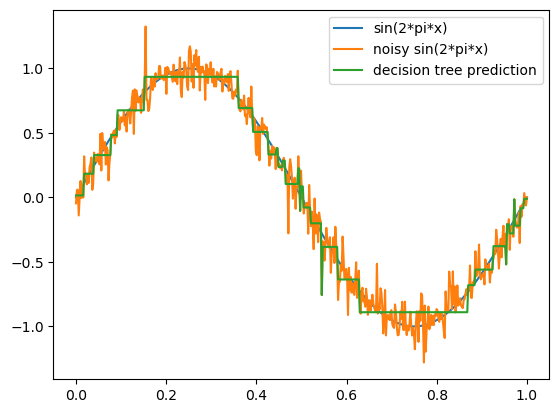

In [5]:
fig, ax = plt.subplots()

ax.plot(x, y, label='sin(2*pi*x)')
ax.plot(x, noisy_y, label='noisy sin(2*pi*x)')
ax.plot(x, tree_model.predict(x.reshape(-1, 1)), label='decision tree prediction')

ax.legend()

### Decision Tree Regression with Cost Complexity Pruning

Here we specify a grid of values for $\alpha$ and find the subtree that minimizes the cost function. We can see that the tree is pruned as $\alpha$ increases.

In [6]:
pruned_tree = tree.DecisionTreeRegressor(max_depth=3,ccp_alpha=.01)



In [7]:
model=pruned_tree.fit(x.reshape(-1, 1), noisy_y)

predictions=pruned_tree.predict(x.reshape(-1, 1))


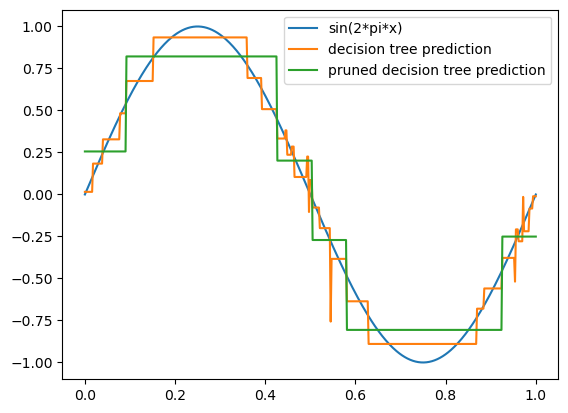

In [8]:
fig, ax = plt.subplots()

ax.plot(x, y, label='sin(2*pi*x)')


#ax.plot(x, noisy_y, label='noisy sin(2*pi*x)')
ax.plot(x, tree_model.predict(x.reshape(-1, 1)), label='decision tree prediction')
ax.plot(x, pruned_tree.predict(x.reshape(-1, 1)), label='pruned decision tree prediction')

ax.legend()


Note the pruned tree gives a coarser prediction; which is best to prevent overfitting.

### Random Forests

Random forests are an ensemble method that combine the predictions of many decision trees. The idea is to construct many trees and then average the predictions. The trees are constructed in a random fashion. The randomization comes from two sources:

1. The training data is sampled with replacement. This is called bagging.

2. The features are sampled without replacement. This is called random subspace of $m$ features where $m < p$.

The random subspace method is important because it prevents the trees from being correlated. If the trees are correlated then the ensemble will not be as effective. Specifically by sampling the features without replacement we are forcing the trees to be different. This is because the trees are constructed by finding the best split on a feature. If we sample the features without replacement then the trees will be forced to find the best split on different features. This is a form of regularization.

In [9]:
random_forest = RandomForestRegressor(max_depth=5, n_estimators=1000,ccp_alpha=0.01)


In [10]:
ensemble_model=random_forest.fit(x.reshape(-1, 1), noisy_y)

predictions=random_forest.predict(x.reshape(-1, 1))

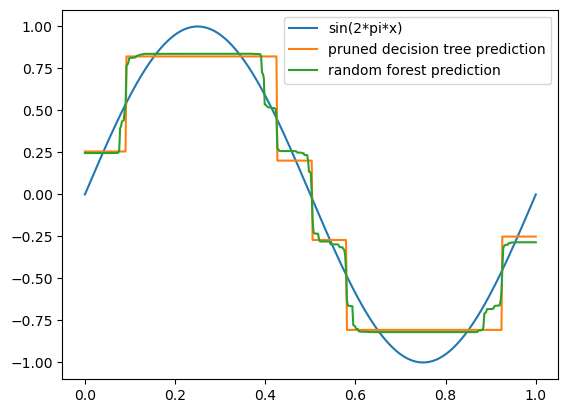

In [11]:
fig, ax = plt.subplots()

ax.plot(x, y, label='sin(2*pi*x)')
#ax.plot(x, noisy_y, label='noisy sin(2*pi*x)')
#ax.plot(x, tree_model.predict(x.reshape(-1, 1)), label='decision tree prediction')
ax.plot(x, pruned_tree.predict(x.reshape(-1, 1)), label='pruned decision tree prediction')

ax.plot(x, random_forest.predict(x.reshape(-1, 1)), label='random forest prediction')

ax.legend()